<a href="https://colab.research.google.com/github/hellosmallkat/NSDC-Customer-Segmentation-Analysis-Project/blob/main/Finshed_version_of_Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<h1 align="center">
    NSDC Data Science Projects
</h1>
  
<h2 align="center">
    Project: Customer Segmentation Analysis
</h2>

<h3 align="center">
    Name: hellosmallkat

</h3>


### **Please read before you begin your project**

**Instructions: Google Colab Notebooks:**

Google Colab is a free cloud service. It is a hosted Jupyter notebook service that requires no setup to use, while providing free access to computing resources. We will be using Google Colab for this project.

In order to work within the Google Colab Notebook, **please start by clicking on "File" and then "Save a copy in Drive."** This will save a copy of the notebook in your personal Google Drive.

Please rename the file to "Customer Segmentation - Your Full Name." Once this project is completed, you will be prompted to share your file with the National Student Data Corps (NSDC) Project Leaders.

You can now start working on the project. :)


**Project Description:**

This project will introduce students to an array of skills as they strive to create an unsupervised machine learning model to divide customers into segments to optimize the significance of each customer. Customer segmentation is the process of grouping consumers according to characteristics that are shared by all of the customers in a cluster. We will also cover visualizations and how to deploy models in the real world.


Google Colab QuickStart:
- Google Colab is a Python Notebook environment built by Google that's free for all.
- Colab Notebooks are made up of cells; cells can be either *text* or *code* cells. You can click the +code or +text button at the top of the Notebook to create a new cell.
- Text cells use a format called [Markdown](https://www.markdownguide.org/getting-started/). Knowledge of Markdown is not required for this project. However, if you'd like to learn more, [check out this Cheatsheet!](https://www.markdownguide.org/cheat-sheet/)
- Python code is executed in *code* cells. When you want to run your code, hover your cursor over the square brackets in the top left corner of your code cell. You'll notice a play button pop up! (▶) Click the play button to run the code in that cell. Code cells run one at a time.
- The memory shared across your notebook is called the *Runtime*. You can think of a Runtime as a "code session" where everything you create and execute is temporarily stored.
- Runtimes will persist for a short period of time, so you are safe if you need to refresh the page, but Google will shutdown a Runtime after enough time has passed. Everything that you have printed out will remain within your Notebook even if the runtime is disconnected.

If this is your first time using Google Colab, we highly recommend reviewing the [NSDC's *Using Google Colab Guide*](https://nebigdatahub.org/wp-content/uploads/2023/04/NSDC-Data-Science-Projects-Introduction-Using-Google-Colab.pdf) before continuing. For a more comprehensive guide, see [Colab's *Welcome To Colaboratory* walkthrough.](https://colab.research.google.com/github/prites18/NoteNote/blob/master/Welcome_To_Colaboratory.ipynb)


---
---



<h3 align = "center">
    Milestone #1: Data Retrieval and Pre-Processing
</h3>

GOAL: The main goal of this milestone is to set up your environment, install the required packages, learn how to access data and do some basic data preparation tasks.

**Step 1:** Setting up libraries and installing packages

To install a library:
```python
 import <library> as <shortname>
```
We use a *short name* since it is easier to refer to the package to access functions and also to refer to subpackages within the library.


In [89]:
#TODO: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

---

**Step 2:** Let’s access our data. We will be using the Marketing Campaign dataset from Kaggle.


[The Marketing Campaign  dataset is available at this link](https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign). It is better to use the link provided directly within the read_csv function.



We will use pandas to read the data from the csv file using the `read_csv` function. This function returns a pandas dataframe. We will store this dataframe in a variable called `df`.

In [90]:
# TODO: Read the data using pandas read_csv function
df = pd.read_csv("marketing_campaign.csv",sep=';')

---

**Step 3:** Let's prepare our data for analysis. Follow the steps below to review the first 5 rows of your dataset, display column names, and get other basic information about the dataset.

In [91]:
# TODO: Print the first 5 rows of the data using the head function of pandas.
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [92]:
# TODO: Display all the column names.
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [93]:
# TODO: Print the dimensions of the dataset using the shape function.
df.shape

(2240, 29)

In [94]:
# TODO: Use info function to get basic information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [95]:
# TODO: Describe the data using describe function of pandas.
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [96]:
# TODO: Check for missing values in the dataset.
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [97]:
df.head()
df.columns


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [98]:
# TODO: Drop the missing values.
df.dropna(inplace = True)

In [99]:
# TODO: Check for duplicates.
df.duplicated().sum()

np.int64(0)

In [100]:
#TODO: Rename column names.
df.rename(columns = {'Year_Birth': 'Birth_Year',})

,ID,Birth_Year,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0



---

---
---



<h3 align = "center">
    Milestone #2: Feature Engineering
</h3>

GOAL: The main goal of this milestone is to do some feature engineering and perform exploratory data analysis (EDA).

**Step 1:** The goal of this step is to perform feature engineering as required and drop the features that are irrelevant. To better understand feature engineering, [review this resource.](https://builtin.com/articles/feature-engineering) Then, fill in the blanks below.

In [101]:
# TODO: Perform feature engineering as required.
# Create a new column named 'Age'.
df['Age'] = 2022 - df['Year_Birth']

# TODO: Create a new column for all the accepted campaigns.
df['Accepted_Campaigns'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

# TODO: Create a new column for all the items.
df['Total_Items'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# TODO: Create a new column for all the purchases.
df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# TODO: Display the dataframe with the updated columns.
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Accepted_Campaigns,Total_Items,Total_Purchases
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,65,0,1617,25
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,68,0,27,6
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,57,0,776,21
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,38,0,53,8
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,41,0,422,19


In [102]:
 # TODO: Drop irrelevant features.
df = df.drop(['Dt_Customer', 'Complain', 'Response', 'Year_Birth', 'ID'], axis = 1)

# TODO: Display the dataframe.
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Z_CostContact,Z_Revenue,Age,Accepted_Campaigns,Total_Items,Total_Purchases
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,3,11,65,0,1617,25
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,3,11,68,0,27,6
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,3,11,57,0,776,21
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,3,11,38,0,53,8
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,3,11,41,0,422,19


---

**Step 2:** Now that we have dealt with outliers and done some feature engineering, the next step is to plot some distributions and check for outliers. To do so, [review this resource to best understand interquartile range](https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th/a/interquartile-range-review), as we will be using that statistic below. Then, fill in the blanks.

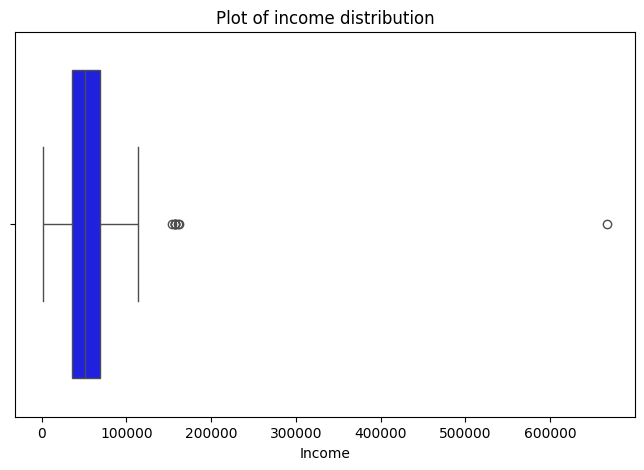

In [103]:
# TODO: Plot distributions for the relevant columns and check for outliers.
# Boxplot for `Income` distribution.
plt.figure(figsize = (8,5))
sns.boxplot(df, x = 'Income',  color = 'blue')
plt.title('Plot of income distribution');

In [104]:
# TODO: Calculate the Interquartile range (IQR) for the `Income` column.
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# TODO: Identify the outliers in the Income column
outliers = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]

# TODO: Print the number of outliers
print("Outliers in the Income column:", len(outliers))

Outliers in the Income column: 8


In [105]:
# TODO: Remove the outliers in the `Income` column.
df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR)))]

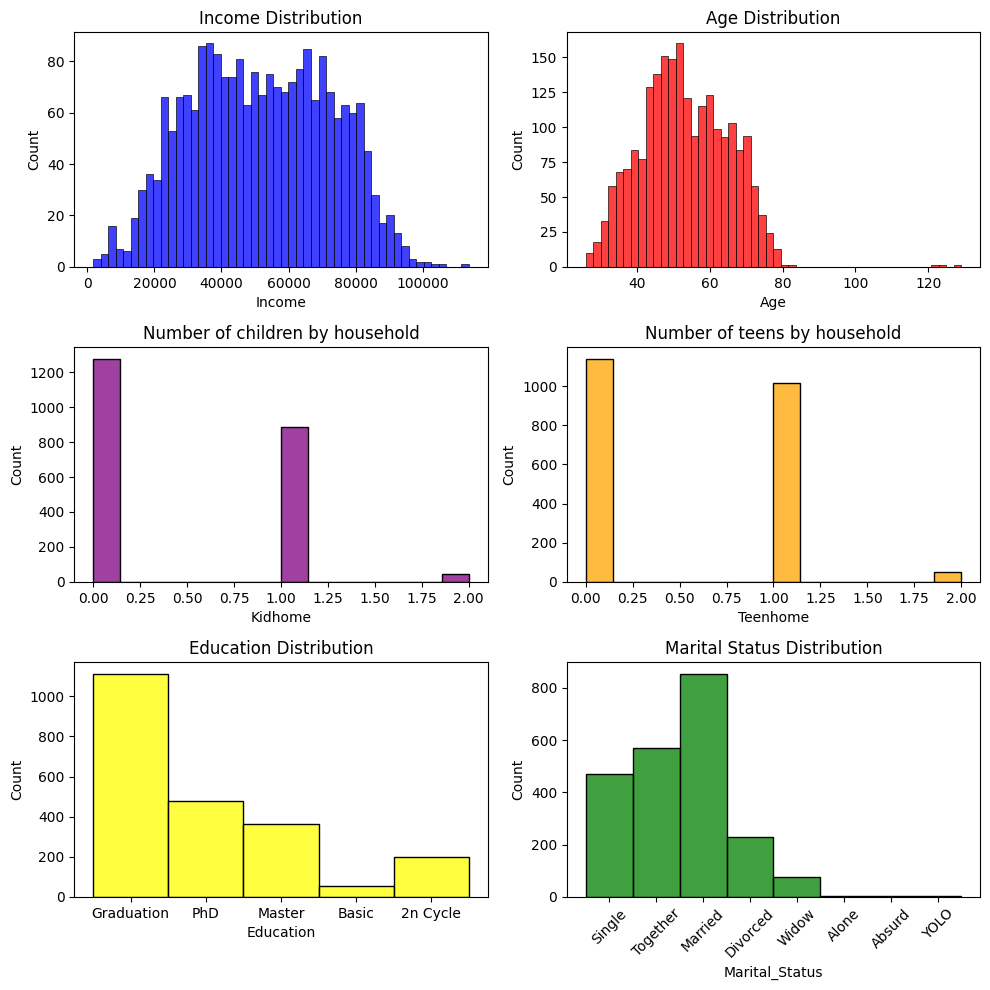

In [106]:
# TODO: Plot Histograms for the important columns.
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10,10))

# TODO: Histogram for `Income` distribution.
sns.histplot(df, x = 'Income', color = 'Blue', bins = 50, ax = axes[0,0])
axes[0,0].set_title('Income Distribution')

# TODO: Histogram for `Age` distribution.
sns.histplot(df, x = 'Age', color = 'Red', bins = 50, ax = axes[0,1])
axes[0,1].set_title('Age Distribution')

# TODO: Histogram for `Kidhome` distribution.
sns.histplot(df, x = 'Kidhome', color = 'Purple', ax = axes[1,0])
axes[1,0].set_title('Number of children by household')

# TODO: Histogram for `Teenhome` distribution.
sns.histplot(df, x = 'Teenhome', color = 'Orange', ax = axes[1,1])
axes[1,1].set_title('Number of teens by household')

# TODO: Histogram for `Education` distribution.
sns.histplot(df, x = 'Education', color ='Yellow', ax = axes[2,0])
axes[2,0].set_title('Education Distribution')

# TODO: Histogram for `Marital_Status` distribution.
sns.histplot(df, x = 'Marital_Status', color = 'Green', ax = axes[2,1])
axes[2,1].set_title('Marital Status Distribution')
plt.xticks(rotation = 45)

plt.tight_layout();

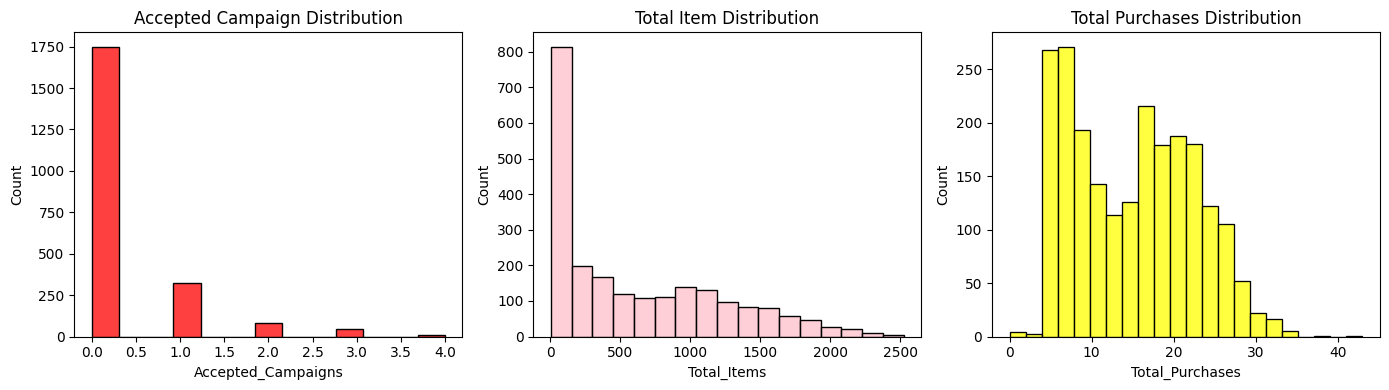

In [107]:
# TODO: Distributions for `Accepted_Campaigns`, `Total_Items`, and `Total_Purchases' columns.
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (14,4))

sns.histplot(df, x = 'Accepted_Campaigns', color = 'red', ax = axes[0])
axes[0].set_title('Accepted Campaign Distribution')

sns.histplot(df, x = 'Total_Items', color = 'pink', ax = axes[1])
axes[1].set_title('Total Item Distribution')

sns.histplot(df, x = 'Total_Purchases', color = 'yellow', ax = axes[2])
axes[2].set_title('Total Purchases Distribution')
plt.tight_layout();

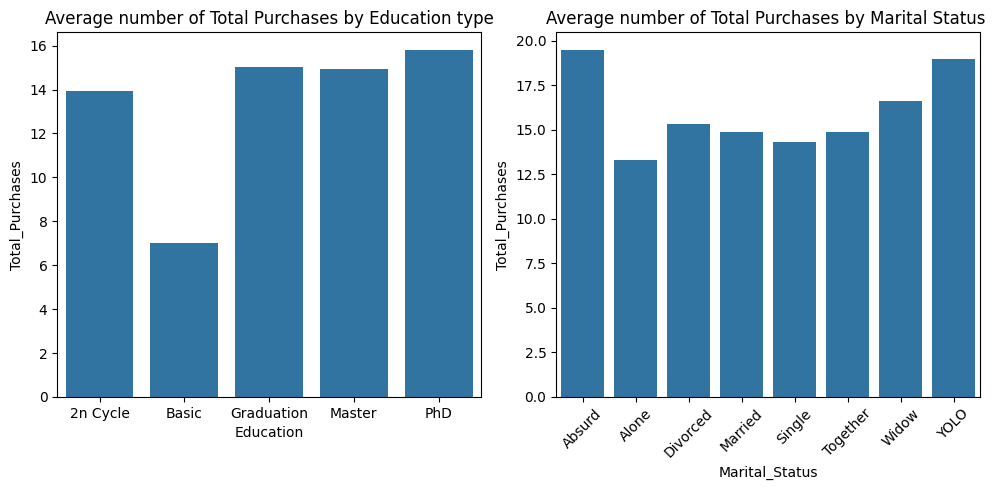

In [108]:
fig, axes = plt.subplots(1, 2, figsize = (10,5))

# TODO: Bar plot for `Total_Purchases` by `Education`.
df1 = df.groupby('Education', as_index=False)['Total_Purchases'].mean()
sns.barplot(data=df1, x='Education', y='Total_Purchases', ax=axes[0])
axes[0].set_title('Average number of Total Purchases by Education type')

# TODO: Bar plot for `Total_Purchases` by `Marital_Status`.
df2 = df.groupby('Marital_Status', as_index=False)['Total_Purchases'].mean()
sns.barplot(data=df2, x='Marital_Status', y='Total_Purchases', ax=axes[1])
axes[1].set_title('Average number of Total Purchases by Marital Status ')
plt.xticks(rotation = 45)

plt.tight_layout();

**TO DO:** List 3 observations you've made from the visualizations above.
>*  Customers with a basic education tend to make the fewest purchases, reflecting the typically economic situation of people who have a basic education.
>*  Absurd and yolo martial types have the highest total number of purchases, even though they don't have a partner.
>*  The overall trend is that if a person is lonely tend to do more purchasing


---
---



<h3 align = "center">
    Milestone #3: K-Means Clustering and Principal Component Analysis
</h3>

GOAL: The main goal of this milestone is to perform K-means clustering and dimensionality reduction using principal component analysis(PCA).

**Step 1:** Now that we have prepared the data and performed exploratory data analysis (EDA), we will now begin with one-hot encoding to encode the categorical variables in the dataset, followed by data scaling. [Find a resource here to better understand one hot encoding, including examples!](https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th/a/interquartile-range-review) To review the StandardScaler function, [review this resource.](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [109]:
# TODO: Perform One-hot encoding
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'])

In [110]:
# TODO: Perform data scaling using StandardScaler function.
scaler = StandardScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), columns= df.columns )

---


**Step 2:** After One-hot encoding and data scaling, we can now execute dimensionality reduction using principal component analysis (PCA). Here's a [resource from IBM that further explains PCA.](https://www.ibm.com/topics/principal-component-analysis)

In [111]:
# TODO: Initialize and fit the PCA model.
pca = PCA(n_components = 3)
pca.fit(df)
PCA_df = pd.DataFrame(pca.transform(df), columns=(["Group_1","Group_2", "Group_3"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Group_1,2208.0,-9.654113e-18,2.939927,-4.895757,-2.747600,-0.665938,2.452633,8.980211
Group_2,2208.0,9.654113e-17,1.578740,-4.673645,-1.003048,-0.058798,0.897290,8.422970
Group_3,2208.0,5.792468e-17,1.533703,-4.463994,-0.978404,-0.157993,0.775505,6.958791


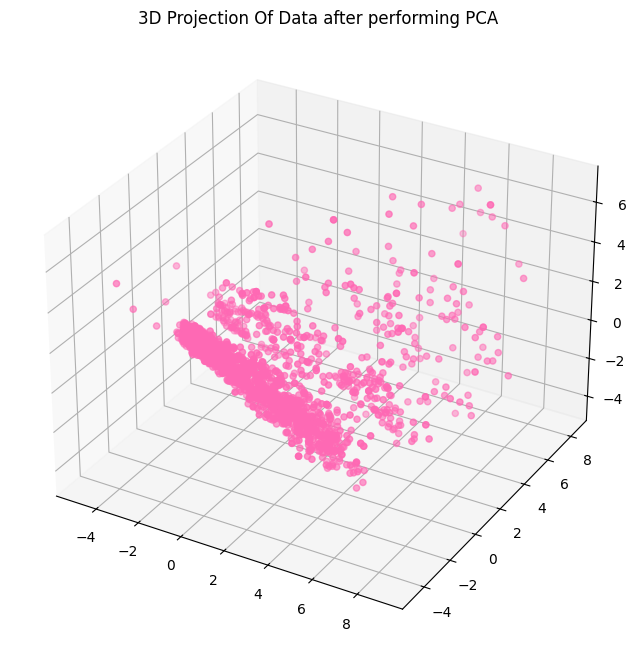

In [112]:
x = PCA_df["Group_1"]
y = PCA_df["Group_2"]
z = PCA_df["Group_3"]

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(x, y, z, c = "hotpink")
ax.set_title("3D Projection Of Data after performing PCA")
plt.show()

---

**Step 3:** In this step, we will use the Elbow method to determine the optimal number of clusters and fit the K-Means model. [Here's an explanation of the Elbow method.](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/)

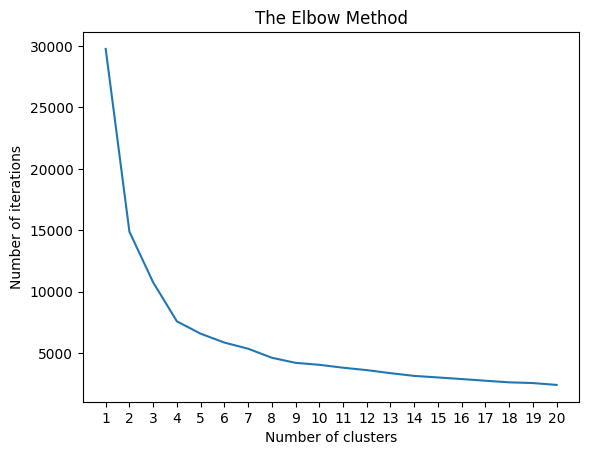

In [113]:
# TODO: Use Elbow method to determine the best number of clusters.
wcss = []

for k in range(1, 21):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(PCA_df)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1,21), wcss)
plt.xticks(range(1,21))
plt.xlabel("Number of clusters")
plt.ylabel("Number of iterations")
plt.title("The Elbow Method")
plt.show()

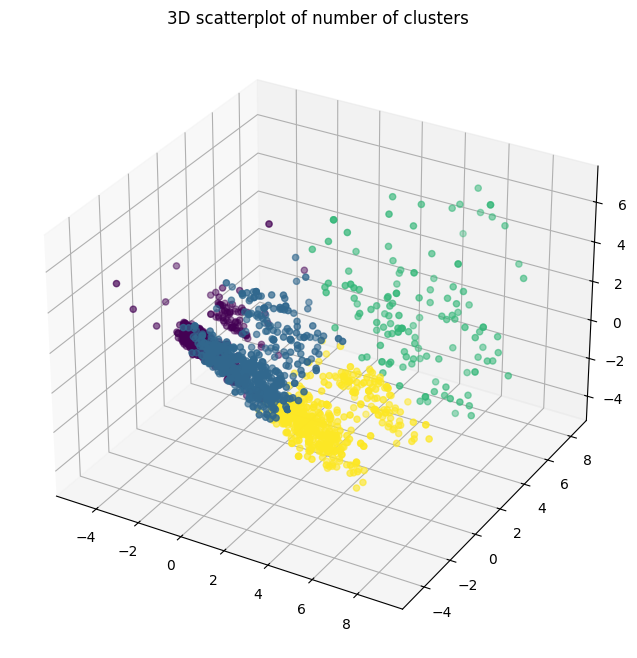

In [116]:
# TODO: Fit the K-Means model with the number of clusters and visualize it in 3D.
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(PCA_df)
df['Cluster'] = kmeans.labels_

fig = plt.figure(figsize = (10,8))
ax = plt.subplot(111, projection = '3d')
ax.scatter(x, y, z, c = df["Cluster"])
ax.set_title("3D scatterplot of number of clusters")
plt.show()

---
---

<h3 align = 'center' >
Thank you for completing the project!
</h3>

Please submit all materials to the NSDC HQ team at nsdc@nebigdatahub.org in order to receive a virtual certificate of completion. Do reach out to us if you have any questions or concerns. We are here to help you learn and grow.